In [6]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Rescaling, Flatten, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
im_size = (32,32)
batch_size = 128
path = "C:/Users/maxis/Desktop/Proseminar - CNN/Data/AI or Real/archive/train"

train = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=im_size,
    validation_split=0.2,
    seed=123,
    subset="training",
    batch_size=batch_size
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size=im_size,
    validation_split=0.2,
    seed=123,
    subset="validation",
    batch_size=batch_size
)

classes = train.class_names
print(len(classes))

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Found 100000 files belonging to 2 classes.
Using 20000 files for validation.
2


In [51]:
model = Sequential([
    InputLayer((32, 32, 3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    Conv2D(32, (3,3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    Dropout(0.25),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_14 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 64)        0         
                                                     

In [52]:
model.fit(train, validation_data=val, epochs=10)

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.3965 - accuracy: 0.8176 - val_loss: 0.3304 - val_accuracy: 0.8656
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2660 - accuracy: 0.8892 - val_loss: 0.2773 - val_accuracy: 0.8891
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2350 - accuracy: 0.9047 - val_loss: 0.2357 - val_accuracy: 0.9080
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2085 - accuracy: 0.9159 - val_loss: 0.2114 - val_accuracy: 0.9197
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1974 - accuracy: 0.9206 - val_loss: 0.2041 - val_accuracy: 0.9234
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1838 - accuracy: 0.9265 - val_loss: 0.2238 - val_accuracy: 0.9107
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1749 - accuracy: 0.9306 - val_loss: 0.1963 - val_accuracy:

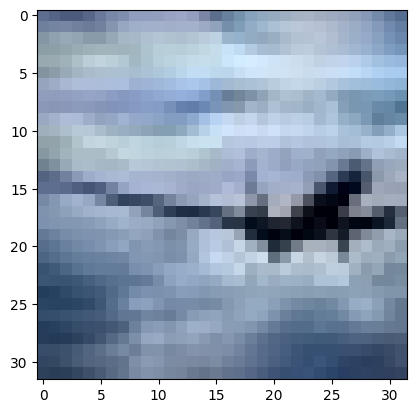

1/1 [==============================] - 0s 19ms/step
FAKE


In [66]:
img = tf.keras.preprocessing.image.load_img("C:/Users/maxis/Desktop/Proseminar - CNN/Data/AI or Real/archive/test/FAKE/1.jpg", target_size=(32,32))
plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
print(classes[np.argmax(prediction)])

In [67]:
model.save(os.path.join("C:/Users/maxis/Desktop/Proseminar - CNN/Models","AI_or_REAL_93_accuracy.h5"))